In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
import openweathermapy.core as owm
from random import randint
import numpy as np
from config import key1, key2, key3, key4, key5, key6, key7, key8
import csv
from citipy import citipy

In [2]:
# Randomly select 500 unique latitudes, must do more than 500 b/c there will be duplicates that need to be deleted
latitude = []

for x in range(3000):
    latitude.append(np.random.uniform(low=-180, high=180, size=None))


lat_series = pd.Series(latitude)

In [3]:
longitude = []

for x in range(3000):
    longitude.append(np.random.uniform(low=-180, high=180, size=None))
    
long_series = pd.Series(longitude)

In [4]:
#getting the series together to then convert to DF and add appropriate columns
lat_long = pd.concat([lat_series, long_series], axis=1)

#renaming columns to fit lat and long
lat_long = lat_long.rename(columns={0: "Latitude", 1:"Longitude"})
lat_long.head()

,Latitude,Longitude
0,-121.096278,131.881370
1,132.942058,129.823589
2,52.360768,28.271082
3,86.943924,-129.136261
4,27.033118,179.568666


In [5]:
# finding cites to match with lat and long, storing them in an empty list
cities = []

for index, row in lat_long.iterrows():
    x = row["Latitude"]
    y = row["Longitude"]
    city = citipy.nearest_city(x,y)
    lat_long.set_value(index, "City", city.city_name)
    lat_long.set_value(index, "Country Code", city.country_code)
    list_city = city.city_name
    cities.append(list_city)
    
    
cities = pd.Series(cities)

#making sure there are no duplicate rows from iterations
lat_long = lat_long.drop_duplicates(subset = ["City"], keep = "first")
lat_long = lat_long.reset_index(drop=True)
lat_long.head()

C:\Users\Owner\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Owner\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,Latitude,Longitude,City,Country Code
0,-121.096278,131.881370,hobart,au
1,132.942058,129.823589,tiksi,ru
2,52.360768,28.271082,lyuban,by
3,86.943924,-129.136261,tuktoyaktuk,ca
4,27.033118,179.568666,butaritari,ki


In [6]:
# Create empty list for storing city + country code together
city_code = []

# fidning list of cities to find their weather data
for index, row in lat_long.iterrows():
    x = row["City"]
    y = row["Country Code"]
    city = str(x) + "," + str(y)
    
    if city not in city_code:
        city_code.append(city) 
#city_code

In [7]:
#creating list/df to make arg/kwarg to get specified data
settings = {"units": "imperial", "appid": key8}
summary = ["name", "sys.country", "coord.lon", "coord.lat", "main.temp", "wind.speed", "clouds.all"]


weather_summary = []
# getting weather data
for city in city_code:
    print(f"Retrieving data for city:{city}.")
    try:
        current_weather = owm.get_current(city, **settings)
        weather_char = current_weather(*summary)
        weather_summary.append(weather_char)
        
        
    except: 
        print("No data found.")

Retrieving data for city:hobart,au.
Retrieving data for city:tiksi,ru.
Retrieving data for city:lyuban,by.
Retrieving data for city:tuktoyaktuk,ca.
Retrieving data for city:butaritari,ki.
Retrieving data for city:bluff,nz.
Retrieving data for city:port alfred,za.
Retrieving data for city:rikitea,pf.
Retrieving data for city:tsienyane,bw.
No data found.
Retrieving data for city:ushuaia,ar.
Retrieving data for city:illoqqortoormiut,gl.
No data found.
Retrieving data for city:dourbali,td.
Retrieving data for city:pevek,ru.
Retrieving data for city:constitucion,cl.
Retrieving data for city:rodrigues alves,br.
Retrieving data for city:ijaki,ki.
No data found.
Retrieving data for city:mataura,pf.
No data found.
Retrieving data for city:barentsburg,sj.
No data found.
Retrieving data for city:bredasdorp,za.
Retrieving data for city:sitka,us.
Retrieving data for city:madimba,tz.
Retrieving data for city:qaanaaq,gl.
Retrieving data for city:kaitangata,nz.
Retrieving data for city:dikson,ru.
Retr

Retrieving data for city:severo-kurilsk,ru.
Retrieving data for city:baracoa,cu.
Retrieving data for city:werda,bw.
Retrieving data for city:uglegorsk,ru.
Retrieving data for city:samusu,ws.
No data found.
Retrieving data for city:moravska trebova,cz.
Retrieving data for city:half moon bay,us.
Retrieving data for city:cabo san lucas,mx.
Retrieving data for city:castro,cl.
Retrieving data for city:talcahuano,cl.
Retrieving data for city:maues,br.
Retrieving data for city:formosa do rio preto,br.
Retrieving data for city:toliary,mg.
No data found.
Retrieving data for city:adelaide,au.
Retrieving data for city:mys shmidta,ru.
No data found.
Retrieving data for city:avera,pf.
No data found.
Retrieving data for city:kavaratti,in.
Retrieving data for city:cape town,za.
Retrieving data for city:abu dhabi,ae.
Retrieving data for city:karasburg,na.
Retrieving data for city:khandyga,ru.
Retrieving data for city:masuda,jp.
Retrieving data for city:sao joao da barra,br.
Retrieving data for city:le

Retrieving data for city:easton,us.
Retrieving data for city:kismayo,so.
No data found.
Retrieving data for city:kazalinsk,kz.
No data found.
Retrieving data for city:nemuro,jp.
Retrieving data for city:williams lake,ca.
Retrieving data for city:la palma,pa.
Retrieving data for city:novyy urgal,ru.
Retrieving data for city:glace bay,ca.
Retrieving data for city:minab,ir.
Retrieving data for city:faya,td.
No data found.
Retrieving data for city:fuerte olimpo,py.
Retrieving data for city:galgani,sd.
No data found.
Retrieving data for city:grimshaw,ca.
Retrieving data for city:ransang,ph.
Retrieving data for city:cicero dantas,br.
Retrieving data for city:villazon,bo.
No data found.
Retrieving data for city:codajas,br.
Retrieving data for city:talnakh,ru.
Retrieving data for city:beihai,cn.
Retrieving data for city:mercedes,ar.
Retrieving data for city:kautokeino,no.
Retrieving data for city:kahului,us.
Retrieving data for city:isangel,vu.
Retrieving data for city:sabzevar,ir.
Retrieving 

In [8]:
weather_sum_df = pd.DataFrame(list(weather_summary))
#weather_sum_df.head()
#rename columns
weather_sum_df = weather_sum_df.rename(columns ={0:"City", 1:"Country Code", 2:"Longitude",
                                                  3:"Latitude", 4:"Temperature", 5:"Wind Speed", 6:"Cloudiness"})
weather_sum_df.head()

#saving to csv
weather_sum_df.to_csv("weather_sum_df.csv", header = True)

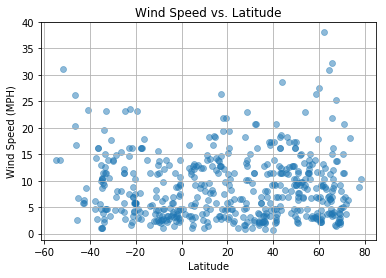

In [9]:
# Wind Speed vs Latitude graph

plt.scatter(weather_sum_df["Latitude"],
            weather_sum_df["Wind Speed"],
            linewidths=.75, marker="o",
            alpha=0.5)

# Labels
plt.title("Wind Speed vs. Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("wind_vs_lat.png")

plt.show()

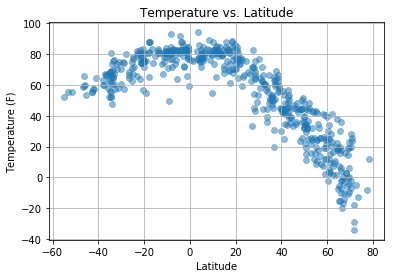

In [10]:
# Temperature vs Latitude graph

plt.scatter(weather_sum_df["Latitude"],
            weather_sum_df["Temperature"],
            linewidths=.75, marker="o",
            alpha=0.5)

# Labels
plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("temp_vs_lat.png")

plt.show()

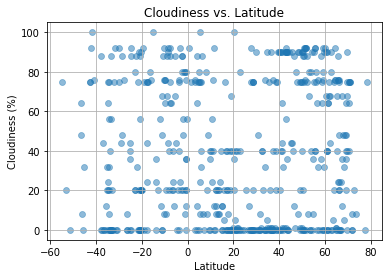

In [11]:
# Cloudiness vs Latitude graph

plt.scatter(weather_sum_df["Latitude"],
            weather_sum_df["Cloudiness"],
            linewidths=.75, marker="o",
            alpha=0.5)

# Labels
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("clouds_vs_lat.png")

plt.show()

506